In [2]:
import pandas as pd

In [3]:
ai_papers = pd.read_csv('./datasets/ai_papers.csv')
dl_papers = pd.read_csv('./datasets/dl_papers.csv')
cv_papers = pd.read_csv('./datasets/cv_papers.csv')

In [4]:
n_papers = 100

ai_papers = ai_papers.iloc[:n_papers, :]
dl_papers = dl_papers.iloc[:n_papers, :]
cv_papers = cv_papers.iloc[:n_papers, :]

In [5]:
# Adicionando coluna 'label'

ai_papers['label'] = "Artificial Intelligence"
dl_papers['label'] = "Digital Libraries"
cv_papers['label'] = "Computer Vision"


In [6]:
# Concatenando os datasets e exportando

papers = pd.concat([ai_papers, dl_papers, cv_papers])
if 'Unnamed: 0' in papers.columns:
    papers.drop(['Unnamed: 0'], axis=1, inplace=True)

## Primeira análise: distilBert + abstracts

In [7]:
# Alterando colunas para "text" e "label"

abstracts = papers[['abstract', 'label']]
abstracts = abstracts.rename({'abstract':'text'}, axis=1)

In [8]:
# # !pip install spacy
# import spacy

# nlp = spacy.load('en_core_web_sm')

# def remove_stopwords_spacy(text):
#     doc = nlp(text)
#     tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
#     return ' '.join(tokens)

# abstracts['text'] = abstracts['text'].apply(remove_stopwords_spacy)

# print(abstracts['text'])


In [9]:
# Pipeline para acelerar transformação para Dataset do HuggingFace

def hf_pipeline(data):
    from datasets import Dataset, ClassLabel

    unique_classes = data['label'].unique()

    dataframe = Dataset.from_pandas(data)
    class_label = ClassLabel(names=list(unique_classes))

    dataframe = dataframe.cast_column('label', class_label)

    return dataframe

In [10]:
abstracts = hf_pipeline(abstracts)

/home/lipecorradini/.cache/pypoetry/virtualenvs/llm-mri-RE74i_Ji-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Casting the dataset: 100%|██████████| 300/300 [00:00<00:00, 105006.36 examples/s]


In [11]:
# Definindo o distilBert como primeiro modelo a ser usado

model_ckpt = 'distilbert-base-uncased'

In [12]:
# Inicializando a biblioteca

from llm_mri import ActivationAreas
from llm_mri.dimensionality_reduction import PCA, SVD

pca = PCA(n_components=40)

llm_mri = ActivationAreas(model=model_ckpt, device="cpu", dataset=abstracts, reduction_method=pca)

### Obtendo métricas para o distilbert-base-uncased

In [13]:
# Processando as áreas de ativação

llm_mri.process_activation_areas()


Map: 100%|██████████| 300/300 [01:12<00:00,  4.13 examples/s]


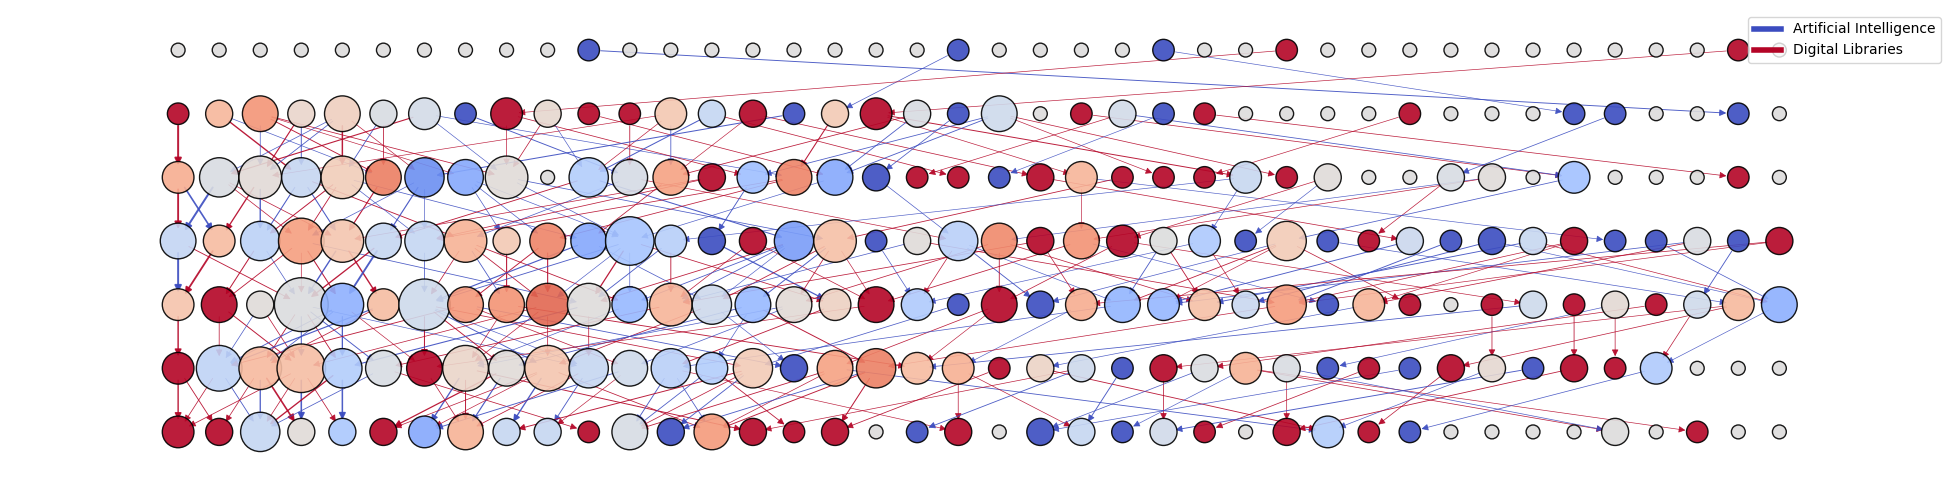

In [19]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Digital Libraries'], threshold=0.3)
_ = llm_mri.get_graph_image(g)
plt.show()

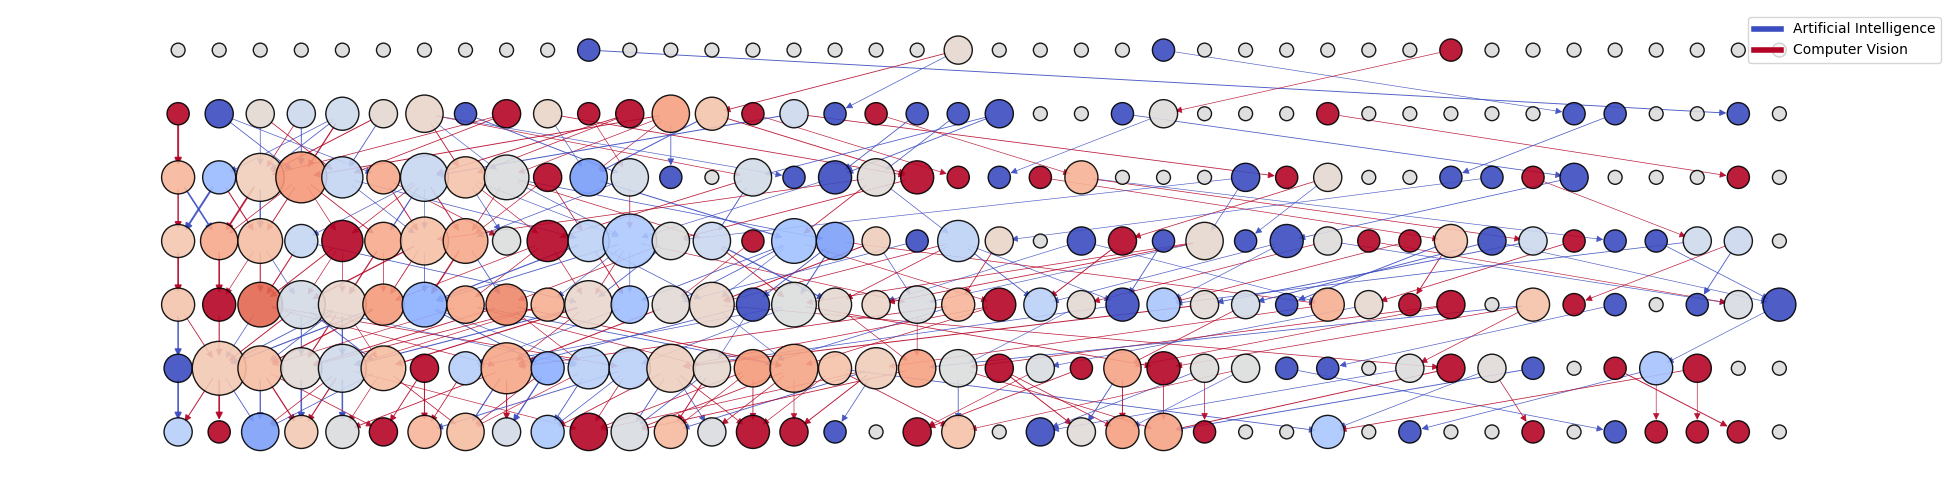

In [18]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Artificial Intelligence', 'Computer Vision'], threshold=0.3)
_ = llm_mri.get_graph_image(g)
plt.show()

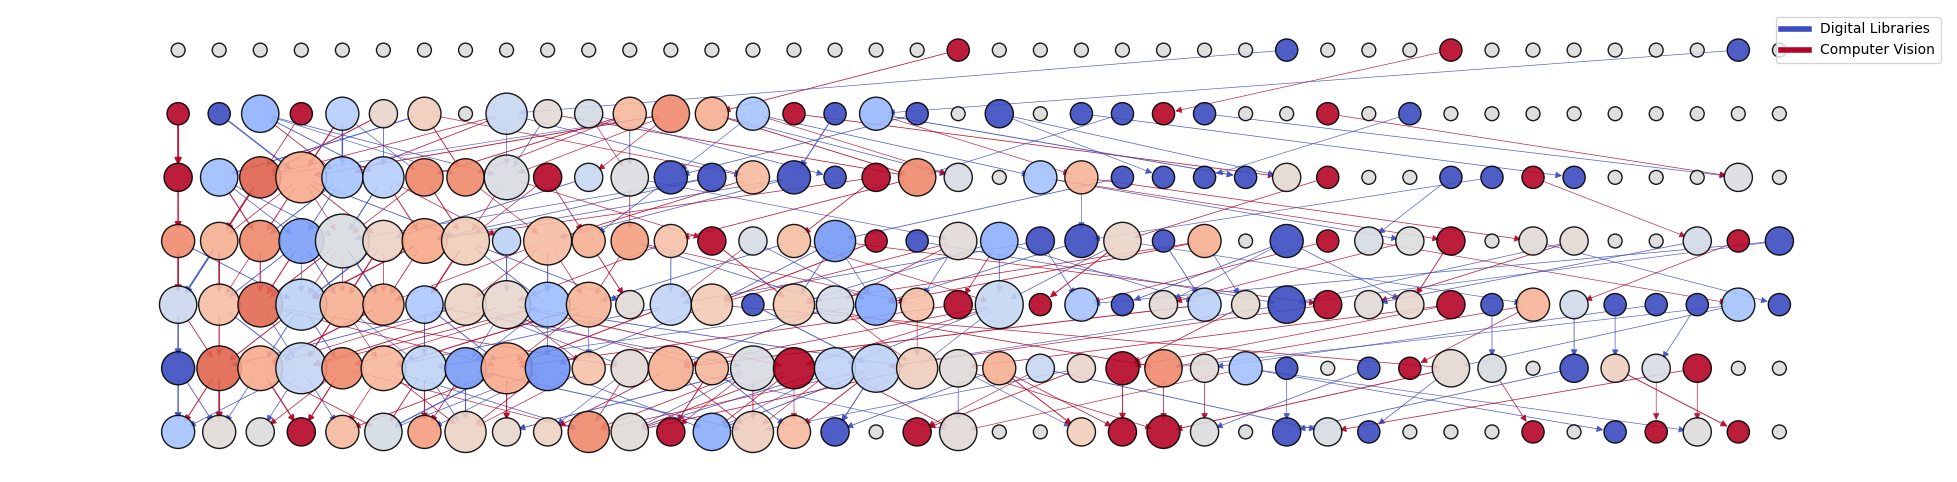

In [20]:
import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Digital Libraries', 'Computer Vision'], threshold=0.3)
_ = llm_mri.get_graph_image(g)
plt.show()

## Obtendo métricas para o bert-base-uncased

In [21]:
model_ckpt = 'bert-base-uncased'
# model_ckpt = 'FacebookAI/roberta-base'

In [22]:
# Inicializando a biblioteca

from llm_mri import ActivationAreas
from llm_mri.dimensionality_reduction import PCA

pca = PCA(n_components=20)

llm_mri = ActivationAreas(model=model_ckpt, device="cpu", dataset=abstracts, reduction_method=pca)

In [23]:
# Processando as áreas de ativação

llm_mri.process_activation_areas()


Map: 100%|██████████| 300/300 [01:55<00:00,  2.61 examples/s]


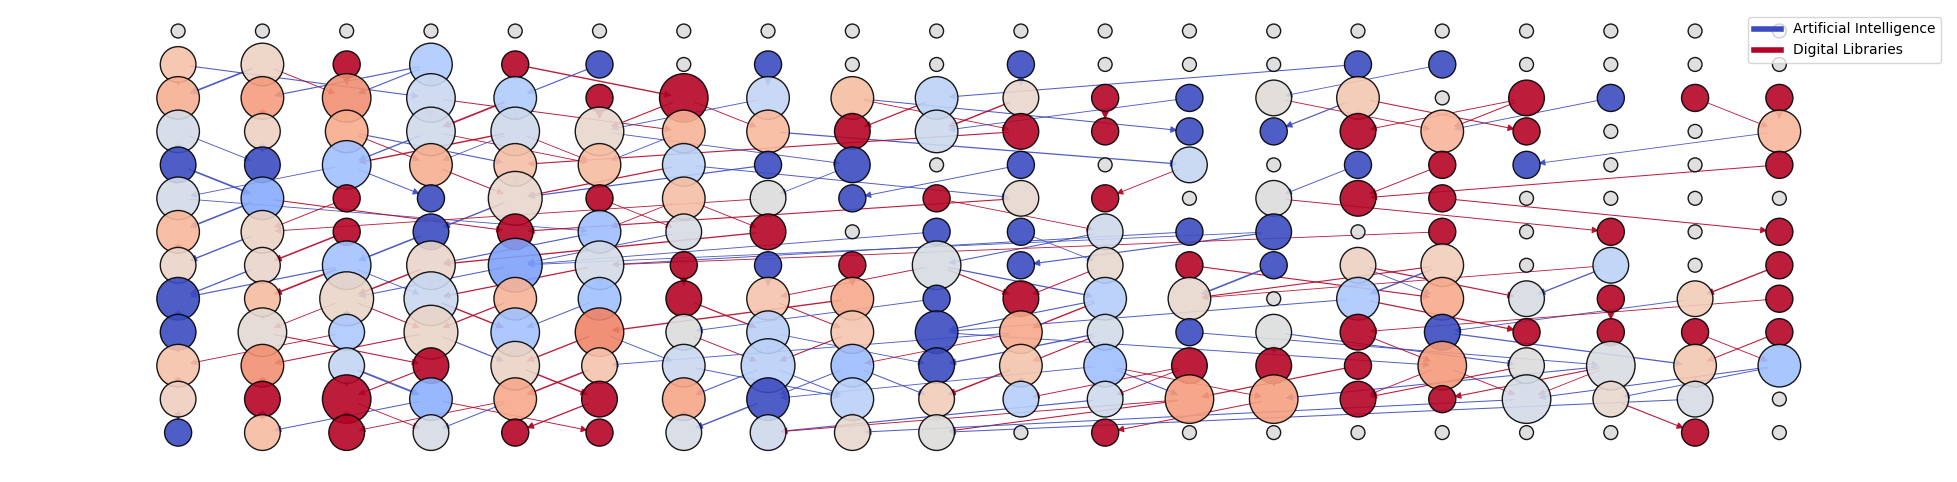

In [24]:
# Visualização das ativações

import matplotlib.pyplot as plt
g_ai_dl = llm_mri.get_graph(['Artificial Intelligence', 'Digital Libraries'], threshold=0.4)
_ = llm_mri.get_graph_image(g_ai_dl)
plt.show()

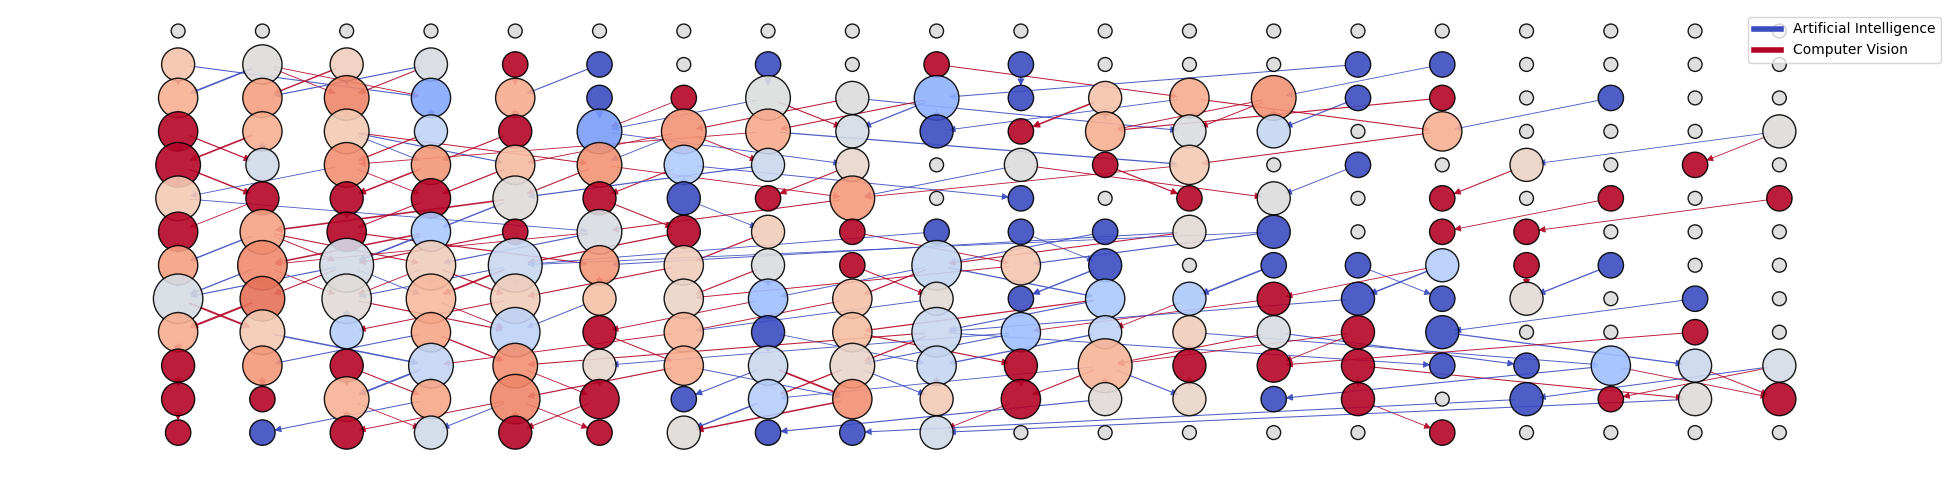

In [25]:
# Visualização das ativações

import matplotlib.pyplot as plt
g_ai_cv = llm_mri.get_graph(['Artificial Intelligence', 'Computer Vision'], threshold=0.4)
_ = llm_mri.get_graph_image(g_ai_cv)
plt.show()

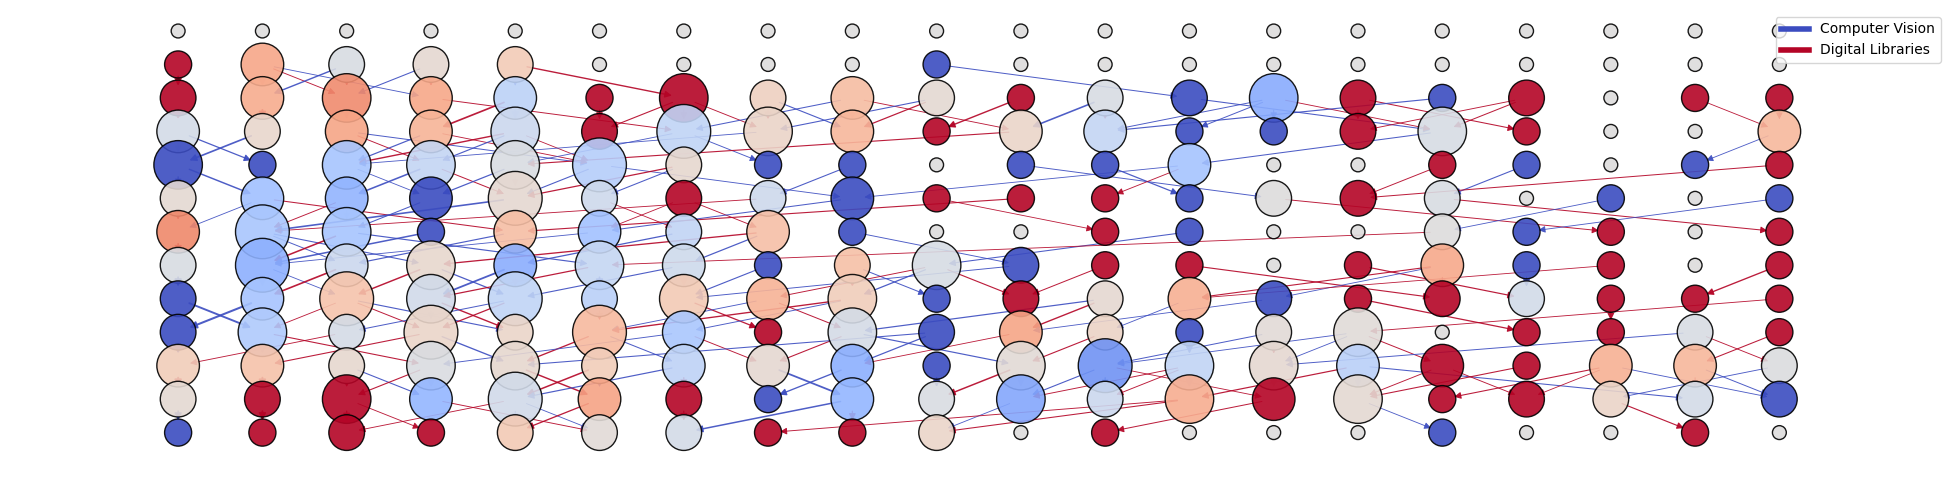

In [26]:
# Visualização das ativações

import matplotlib.pyplot as plt
g = llm_mri.get_graph(['Computer Vision', 'Digital Libraries'], threshold=0.4)
_ = llm_mri.get_graph_image(g)
plt.show()

### Getting individual graphs for metrics analysis

In [27]:
g_ai = llm_mri.get_graph(['Artificial Intelligence'], threshold=0.4)
g_dl = llm_mri.get_graph(['Digital Libraries'], threshold=0.4)
g_cv = llm_mri.get_graph(['Computer Vision'], threshold=0.4)

In [28]:
from llm_mri import Metrics

metrics_ai = Metrics(g_ai, model_name=model_ckpt, label="Artificial Intelligence")
print("Artificial Intelligence metrics: ", metrics_ai.get_basic_metrics())

metrics_dl = Metrics(g_dl, model_name=model_ckpt, label="Digital Libraries")
print("Digital Libraries metrics: ", metrics_dl.get_basic_metrics())

metrics_cv = Metrics(g_cv, model_name=model_ckpt, label="Computer Vision")
print("Computer Vision metrics: ", metrics_cv.get_basic_metrics())

Artificial Intelligence metrics:  {'mean_degree': 0.9615384615384616, 'var_degree': 0.9019899019899021, 'skew_degree': 0.8128915476597909, 'kurt_degree': 0.38155951517969466, 'mean_strength': 0.5470751031086996, 'var_strength': 0.3130257807200971, 'skew_strength': 0.8202928046485108, 'kurt_strength': -0.17724551846460956, 'assortativity': 0.24433630507724574, 'density': 0.0018562518562518563, 'center_of_mass': -0.5, 'center_of_strength': nan, 'model_name': 'bert-base-uncased', 'label': 'Artificial Intelligence'}
Digital Libraries metrics:  {'mean_degree': 0.9538461538461539, 'var_degree': 0.7855063855063855, 'skew_degree': 0.627051073362191, 'kurt_degree': -0.07563117367623962, 'mean_strength': 0.5308032274246216, 'var_strength': 0.25493384318024975, 'skew_strength': 0.7051938312527444, 'kurt_strength': 0.0012342439836610097, 'assortativity': 0.14361813976613352, 'density': 0.0018414018414018413, 'center_of_mass': -0.5, 'center_of_strength': nan, 'model_name': 'bert-base-uncased', 'lab

Evaluating metrics from similar (AI and CV) and distinct (AI and DL) categories:

In [29]:
metrics_distinct = Metrics(g_ai_dl, model_name=model_ckpt, label="Artificial Intelligence and Digital Libraries")
print("Artificial Intelligence and Digital Libraries metrics: ", metrics_distinct.get_basic_metrics())

metrics_similar = Metrics(g_ai_cv, model_name=model_ckpt, label="Artificial Intelligence and Computer Vision")
print("Artificial Intelligence and Computer Vision metrics: ", metrics_similar.get_basic_metrics())

Artificial Intelligence and Digital Libraries metrics:  {'mean_degree': 1.7538461538461538, 'var_degree': 1.815622215622216, 'skew_degree': 0.32307530032278503, 'kurt_degree': -0.750225332156297, 'mean_strength': 0.9708290049662957, 'var_strength': 0.5997615257070564, 'skew_strength': 0.4142507962451938, 'kurt_strength': -0.7278771530780657, 'assortativity': 0.24406512783706655, 'density': 0.003385803385803386, 'center_of_mass': -0.5, 'center_of_strength': nan, 'model_name': 'bert-base-uncased', 'label': 'Artificial Intelligence and Digital Libraries'}
Artificial Intelligence and Computer Vision metrics:  {'mean_degree': 1.7692307692307692, 'var_degree': 2.2245322245322248, 'skew_degree': 0.5700271511496112, 'kurt_degree': -0.34099236929435195, 'mean_strength': 0.9873611204899274, 'var_strength': 0.7574739597945648, 'skew_strength': 0.6768121610025739, 'kurt_strength': -0.2580573211846713, 'assortativity': 0.3336251967385016, 'density': 0.0034155034155034154, 'center_of_mass': -0.5, 'c

Testing the amount of kept information after the reduction by training two different models using the Evaluation class:

In [30]:
from llm_mri import Evaluation
evaluation = Evaluation(llm_mri)
results = evaluation.evaluate_model()


In [34]:
print(results)
# print("Difference on obtained metrics: ", results['report_difference'])
print("Difference on cross-validation f1-score: ", results['delta']['f1_macro']['mean'])

{'delta': {'f1_macro': {'per_split': [-0.009386973180076752, 0.030752356678392934, 0.05525956263990539, -0.045083480250538654, 0.028657452793722893], 'mean': 0.012039783736281163}, 'f1_weighted': {'per_split': [-0.00938697318007653, 0.030752356678392823, 0.05525956263990517, -0.045083480250538654, 0.028657452793722893], 'mean': 0.01203978373628114}, 'recall_macro': {'per_split': [-0.011111111111111072, 0.03333333333333344, 0.05555555555555569, -0.04444444444444462, 0.03333333333333344], 'mean': 0.013333333333333374}, 'recall_weighted': {'per_split': [-0.011111111111111072, 0.033333333333333326, 0.05555555555555547, -0.0444444444444444, 0.033333333333333326], 'mean': 0.01333333333333333}, 'accuracy': {'per_split': [-0.011111111111111072, 0.033333333333333326, 0.05555555555555547, -0.0444444444444444, 0.033333333333333326], 'mean': 0.01333333333333333}, 'balanced_accuracy': {'per_split': [-0.011111111111111072, 0.03333333333333344, 0.05555555555555569, -0.04444444444444462, 0.03333333333

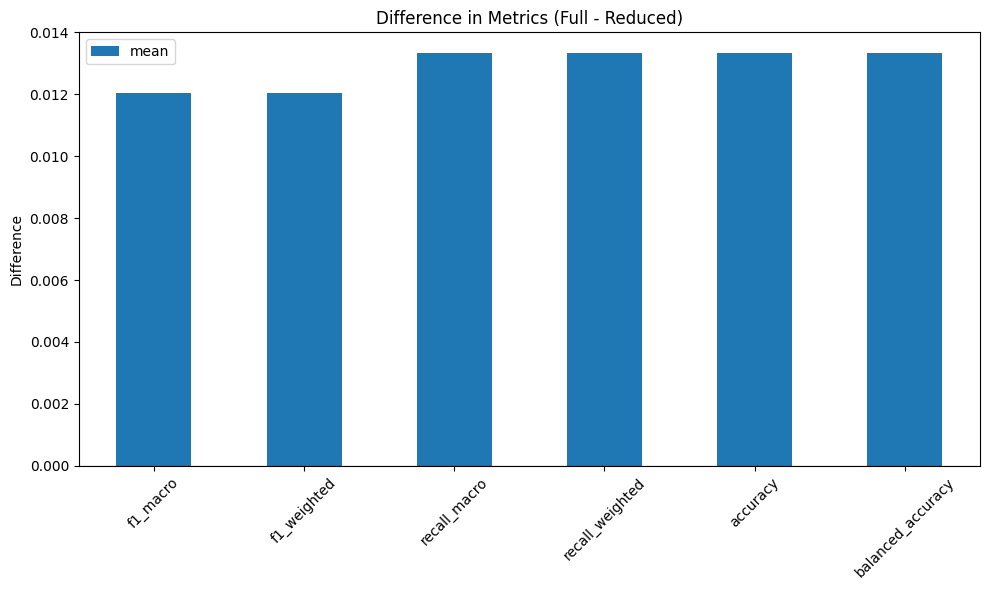

In [35]:
df = pd.DataFrame(results['delta']).T
ax = df.plot(kind="bar", figsize=(10,6))
plt.axhline(0, color="black", linewidth=0.8)  # baseline at 0
plt.title("Difference in Metrics (Full - Reduced)")
plt.ylabel("Difference")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
